In [5]:
!pip install tensorflow
!pip install pandas

In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

data = {
    'comment_text': [
        "I hate you",                 # toxic
        "You are amazing!",          # not toxic
        "This is the worst",         # toxic
        "I love this!",              # not toxic
        "You're such a loser",       # toxic
        "Thanks for helping me",     # not toxic
        "You idiot",                 # toxic
        "That was very kind",        # not toxic
        "Go to hell",                # toxic
        "You're the best"            # not toxic
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = toxic, 0 = not toxic
}

df = pd.DataFrame(data)
df.head()

,comment_text,label
0,I hate you,1
1,You are amazing!,0
2,This is the worst,1
3,I love this!,0
4,You're such a loser,1


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenisasi
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['comment_text'])
sequences = tokenizer.texts_to_sequences(df['comment_text'])
padded = pad_sequences(sequences, maxlen=10)

# Split data
x_train, x_test, y_train, y_test = train_test_split(padded, df['label'], test_size=0.2, random_state=42)

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=10),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3750 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - accuracy: 0.3750 - loss: 0.6936 - val_accuracy: 0.0000e+00 - val_loss: 0.6947
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7500 - loss: 0.6928 - val_accuracy: 0.0000e+00 - val_loss: 0.6948
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7500 - loss: 0.6920 - val_accuracy: 0.0000e+00 - val_loss: 0.6952
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.7500 - loss: 0.6912 - val_accuracy: 0.0000e+00 - val_loss: 0.6955
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.7500 - loss: 0.6904 - val_accuracy: 0.0000e+00 - val_loss: 0.6958
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7500 - loss: 0.6896 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8750 - loss: 0.6889 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.5000 - loss: 0.6972
Akurasi: 0.50


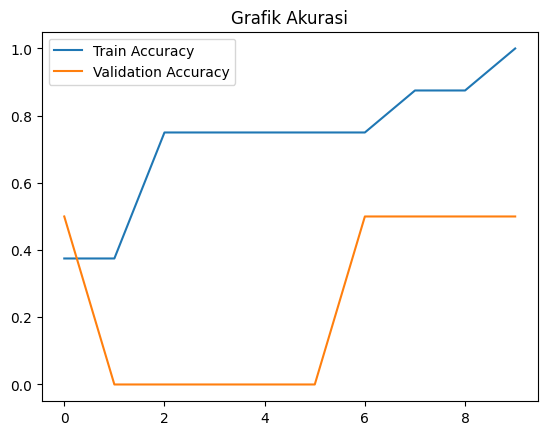

In [11]:
import matplotlib.pyplot as plt

# Evaluasi
loss, acc = model.evaluate(x_test, y_test)
print(f"Akurasi: {acc:.2f}")

# Grafik akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Grafik Akurasi")
plt.show()

In [12]:
def prediksi_komentar(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=10)
    pred = model.predict(padded_seq)[0][0]
    return "TOXIC" if pred >= 0.5 else "NOT TOXIC"

# Contoh uji coba
print(prediksi_komentar("You are amazing"))       # NOT TOXIC
print(prediksi_komentar("You're the worst!"))     # TOXIC

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
TOXIC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
TOXIC
